# Yucatan Peninsula Hurricanes
### Week 4 - Discussion section

### 1. Archive exploration
Take some time to mindfully look through the dataset’s description and metadata.

In your notebook: use a markdown cell to add a brief description of the dataset, including a citation, date of access, and a link to the archive.

### 2. Data loading and preliminary exploration
We will be using the hf071-01-hurricanes.csv file. Agree with your team on how you will import this file to your notebook and store it in a variable named df.

CHECK IN WITH YOUR TEAM

MAKE SURE YOU’VE ALL SUCCESSFULLY ACCESSED THE DATA BEFORE CONTINUING

Obtain preliminary information and explore this data frame using pandas methods.

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read data
hurricane = pd.read_csv('data/hf071-01-hurricanes.csv')
hurricane

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1
...,...,...,...,...,...,...,...,...
100,Y1995a,1995-10-01,1995-10-03,15,Opal,1,N*,F0
101,Y1995b,1995-10-10,1995-10-16,17,Roxanne,3,N,F2
102,Y1996,1996-08-20,1996-08-20,4,Dolly,1,N,F1
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1


In [3]:
# Check dimension of dataframe
hurricane.shape

(105, 8)

In [4]:
# Check the data types
hurricane.dtypes

code          object
start.date    object
end.date      object
number         int64
name          object
ss             int64
track         object
rf.max        object
dtype: object

In [5]:
# Check the sum of null value in each column
hurricane.isnull().sum()

code           0
start.date     0
end.date       0
number         0
name          72
ss             0
track          0
rf.max         0
dtype: int64

### 3. Brainstorm
In this session we want to answer the following question:

How many hurricanes with Saffir-Simpson category 5 have been registered and what was their duration?

Individually, write down step-by-step instructions on how you would wrangle the df data frame to answer the question. Do not code anything yet. Remember: It’s okay if you don’t know how to code each step. The important thing is to have an idea of what you’d like to do.

Discuss your step-by-step instructions with your team. What do you see as potential challenges to implementing your plan?

As a team, select an initial data wrangling plan for answering the question.

#### Brainstorm

    a. Change column names
    b. Date columns to datetime

### 4. Data wrangling
Use your plan as a starting point to answer the question.

You may (or not) need to look online to carry out some of the steps in your plan. It is completely fine to seek help online! Resourceful troubleshooting is a key skill in data science.
It’s ok if your initial plan changes as you work with the data and discuss challenges with your team! This brainstorm is to create a shared starting point.

In [6]:
# Change column names
hurricane.columns = hurricane.columns.str.replace(".", "_")
hurricane.columns

Index(['code', 'start_date', 'end_date', 'number', 'name', 'ss', 'track',
       'rf_max'],
      dtype='object')

In [7]:
# Date columns to datetime
hurricane.start_date = pd.to_datetime(hurricane.start_date)
hurricane.end_date = pd.to_datetime(hurricane.end_date)

In [12]:
# Change start date tio index
hurricane_index = hurricane.set_index('start_date')
hurricane_index

,code,end_date,number,name,ss,track,rf_max
start_date,,,,,,,
1852-10-07,Y1852,1852-10-08,5,NaN,2,O,F1
1857-09-28,Y1857,1857-09-28,4,NaN,2,N,F1
1861-08-17,Y1861,1861-08-17,2,NaN,1,O,Nd
1864-08-31,Y1864,1864-08-31,3,NaN,1,S,F1
1865-09-11,Y1865,1865-09-11,4,NaN,2,O,F1
...,...,...,...,...,...,...,...
1995-10-01,Y1995a,1995-10-03,15,Opal,1,N*,F0
1995-10-10,Y1995b,1995-10-16,17,Roxanne,3,N,F2
1996-08-20,Y1996,1996-08-20,4,Dolly,1,N,F1


In [25]:
# How many hurricanes with Saffir-Simpson category 5 have been registered and what was their duration?
hurricane_cat5 = hurricane[hurricane['ss'] == 5, ].copy()

print("There have been", len(hurricane_cat5), "category 5 hurricanes.")

hurricane_cat5.loc[:, 'duration'] = hurricane_cat5.loc[:, 'end.date'] - hurricane

There have been 4 category 5 hurricanes.


### 5. Visualize Saffir-Simpson categories across time
Create a scatter plot of the start date of the hurricanes against the Saffir-Simpson scale. Use matplotlib to customize your graph, including updating the tick labels to be only 1, 2, 3, 4, and 5 since the Saffir-Simpsn scale does not take decimal values.

Analyze your plot and write (in full sentences!) any trends that you observe.

In [ ]:
# Plot

KeyError: 'start.date'

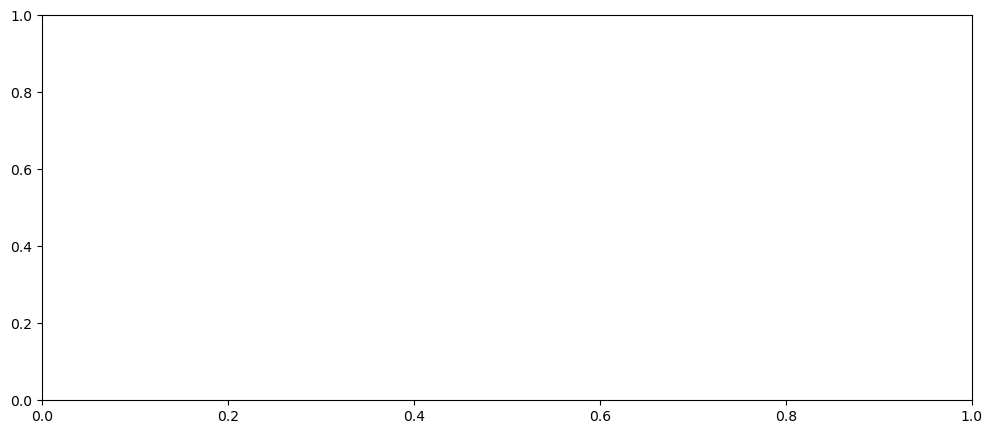

In [27]:
fig, ax = plt.subplots(figsize = (12, 5))

plt.scatter(hurricane['start.date'], hurricane['ss'],
           c = "#3492eb")

plt.yticks([1, 2, 3, 4, 5])

plt.xlabel("Start Date")
plt.ylabel("Hurricane Category")


